# MNIST Data - Sequential API
- This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
- https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools 
import numpy as np

## Data

In [18]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype(np.float32) / 255.0, X_test.astype(np.float32)/ 255.0

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


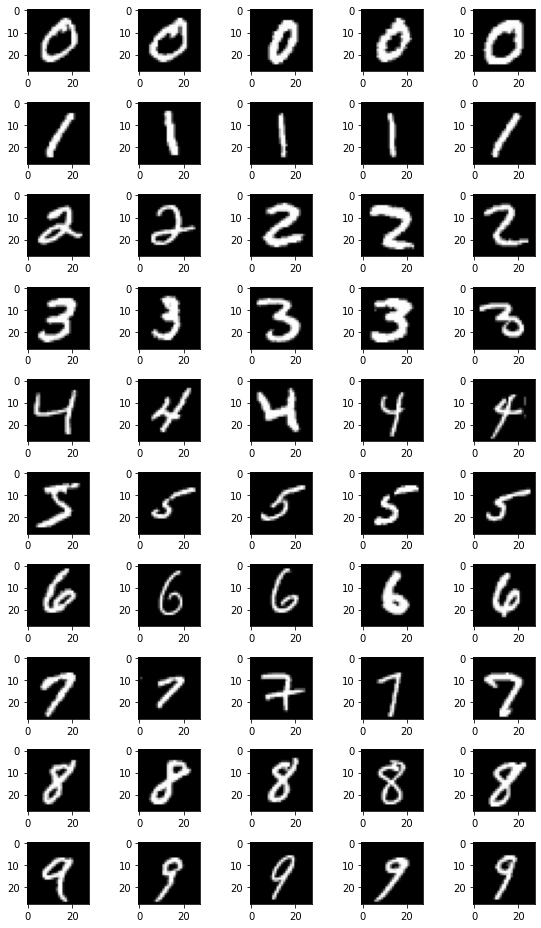

In [20]:
fig, axes = plt.subplots(10,5, figsize=(8,13))
for num in range(10):
    x_plot = X_train[y_train==num]
    for idx in range(np.array(axes).shape[1]):
        axes[num][idx].imshow(x_plot[idx], cmap='gray')
fig.tight_layout()
plt.show()

## Model building
- Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [21]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name='hidden1'),
  tf.keras.layers.Dense(10, activation='softmax', name='output')
])

## Compile model
- Prepare for fitting

In [22]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training (Fitting)

In [24]:
tf_fit = model.fit(X_train, y_train, validation_split=0.1, epochs=5, verbose=1)

Epoch 1/5
1688/1688 [==============================] - 1s 692us/step - loss: 0.2702 - accuracy: 0.9231 - val_loss: 0.1230 - val_accuracy: 0.9657
Epoch 2/5
1688/1688 [==============================] - 1s 635us/step - loss: 0.1198 - accuracy: 0.9647 - val_loss: 0.0939 - val_accuracy: 0.9708
Epoch 3/5
1688/1688 [==============================] - 1s 629us/step - loss: 0.0816 - accuracy: 0.9753 - val_loss: 0.0795 - val_accuracy: 0.9768
Epoch 4/5
1688/1688 [==============================] - 1s 642us/step - loss: 0.0615 - accuracy: 0.9807 - val_loss: 0.0775 - val_accuracy: 0.9777
Epoch 5/5
1688/1688 [==============================] - 1s 638us/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0817 - val_accuracy: 0.9733


In [25]:
for key, val in tf_fit.history.items():
    print( f'{key:20s}: {[ f"{i:3.2f}" for i in val]}')


loss                : ['0.27', '0.12', '0.08', '0.06', '0.05']
accuracy            : ['0.92', '0.96', '0.98', '0.98', '0.99']
val_loss            : ['0.12', '0.09', '0.08', '0.08', '0.08']
val_accuracy        : ['0.97', '0.97', '0.98', '0.98', '0.97']


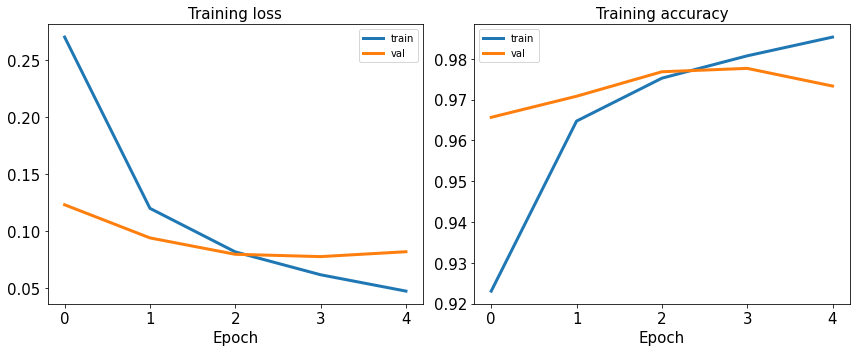

In [26]:
hist = tf_fit.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['train','val'])

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax.legend(['train','val'])

#plt.savefig('mnist1.pdf')

plt.show()

## Evaluation
- The `Model.evaluate` method checks the models performance.

In [27]:
model.evaluate(X_test,  y_test)

313/313 [==============================] - 0s 380us/step - loss: 0.0776 - accuracy: 0.9764


[0.07760504633188248, 0.9764000177383423]

In [28]:
y_hat = model(X_test)
print(y_hat.shape)
print(y_hat.numpy()[:2])

(10000, 10)
[[6.31403168e-07 1.28019515e-08 1.51574923e-05 2.39913864e-03
  3.63989845e-11 3.00271779e-07 7.38816716e-11 9.97574627e-01
  2.30430533e-06 7.84299937e-06]
 [1.36501588e-09 2.69168158e-05 9.99963880e-01 1.29857506e-06
  4.80636310e-15 2.43327889e-07 2.63781157e-08 1.03233909e-13
  7.68535938e-06 1.25324418e-10]]


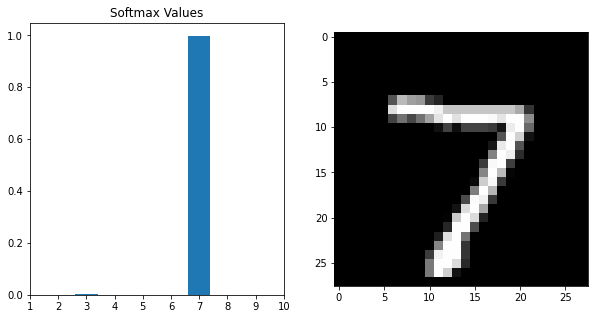

In [29]:
x_ticklabel = [i + 1 for i in range(10)]
fig, axes = plt.subplots(1,2, figsize=(10,5))
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
axes[0].bar(xp, yp)
axes[0].set_title('Softmax Values')
axes[0].set_xticks(x_ticklabel)
axes[0].set_xticklabels(x_ticklabel)
axes[0].set_xlim([1,10])
axes[1].imshow(X_test[0], cmap='gray')
plt.show()

In [30]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(10000,)
(10000,)
Missclassification = 236


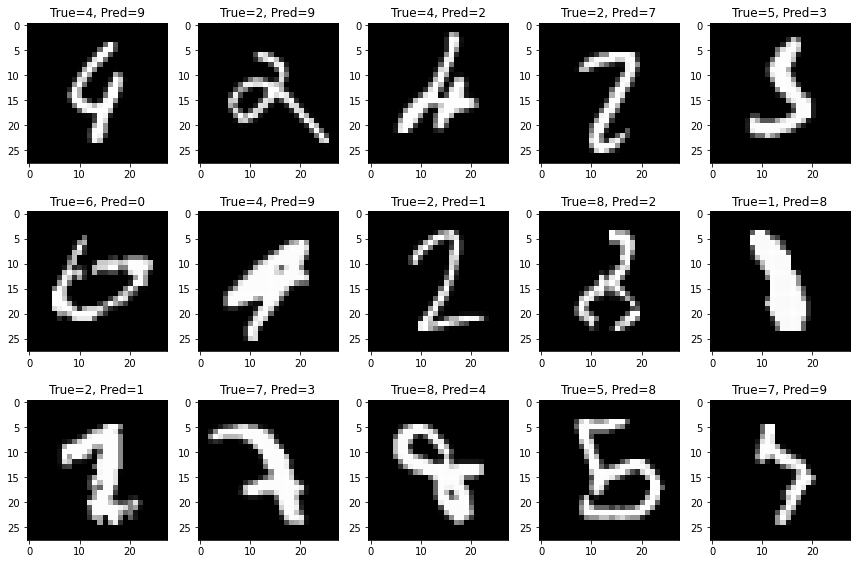

In [31]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()